In [1]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycimg import CImg

In [2]:
def showOpencvImage(image, isGray=False):
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap = 'gray')
#    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    
def readBinaryData(n,SIZE,H,nbytes,BO='BE'):

    if nbytes==2:
        d = np.zeros((SIZE,SIZE,H),np.uint16)
    elif nbytes==1:
        d = np.zeros((SIZE,SIZE,H),np.uint8)
    else:
        print('Wrong number of bytes per voxel')
        return
    
    f=open(n,"rb")
    for i in range(0,H):
        for j in range(0,SIZE):
            for k in range(0,SIZE):
                byte = f.read(nbytes)
                if nbytes==2:
                    if BO =='BE':
                        a = 256*byte[0] + byte[1]
                    elif BO == 'LE':
                        a = byte[0] + 256*byte[1]
                        
                else:
                    a = byte[0]
                d[j,k,i] = a
    f.close()
    return d


In [ ]:
name = '/home/user/Spine/Data/STIR/STIR_10_400_400_20_2_.raw'
SIZE = 400
H = 19
nbytes = 2
stir = readBinaryData(name,SIZE,H,nbytes)

for l in range(0,H):
    showOpencvImage(stir[:,:,l])  

In [3]:
MAN_REG_DIR = '/home/user/Spine/Data/Regions/'
MAN_LES_DIR = '/home/user/Spine/Data/GroundTruth_MajorityVoting/'
STIR_DIR = '/home/user/Spine/Data/STIR/'
T1_DIR = '/home/user/Spine/Data/T1/'
MAN_BONE_LABELS_DIR = '/home/user/Spine/Data/BoneLabels/'

PRED_BONE_LABELS_DIR = '/home/user/Spine/Wyniki_v1/Segmentacja/'
PRED_REG_DIR = '/home/user/Spine/Wyniki_v1/Segmentacja/'

lesions_list = glob.glob(MAN_LES_DIR + 'MV*.raw')
lesions_list.sort()
numbers = [l.split('/')[-1].split('.')[0].split('_')[1] for l in lesions_list]
print(numbers)

pred_regions_list = [f for f in glob.glob(PRED_REG_DIR+'Regions*.raw') if f.split('/')[-1].split('.')[0].split('_')[1] in numbers]
#pred_regions_list = [f for f in glob.glob(PRED_REG_DIR+'Regions*.raw') ]
pred_regions_list.sort()
pred_numbers = [l.split('/')[-1].split('.')[0].split('_')[1] for l in pred_regions_list]
print(pred_numbers)

man_regions_list = [f for f in glob.glob(MAN_REG_DIR+'Regions*.raw') if f.split('/')[-1].split('.')[0].split('_')[1] in numbers]
man_regions_list.sort()
man_numbers = [l.split('/')[-1].split('.')[0].split('_')[1] for l in man_regions_list]
print(man_numbers)

stir_list = [f for f in glob.glob(STIR_DIR+'STIR*.raw') if f.split('/')[-1].split('.')[0].split('_')[1] in numbers]
stir_list.sort()
stir_numbers = [l.split('/')[-1].split('.')[0].split('_')[1] for l in stir_list]
print(stir_numbers)

t1_list = [f for f in glob.glob(T1_DIR+'T1*.raw') if f.split('/')[-1].split('.')[0].split('_')[1] in numbers]
#t1_list = [f for f in glob.glob(T1_DIR+'T1*.raw') ]
t1_list.sort()
t1_numbers = [l.split('/')[-1].split('.')[0].split('_')[1] for l in t1_list]
print(t1_numbers)

predBone_list = [f for f in glob.glob(PRED_BONE_LABELS_DIR+'Pruned*.raw') if f.split('/')[-1].split('.')[0].split('_')[1] in numbers]
predBone_list.sort()
predBone_numbers = [l.split('/')[-1].split('.')[0].split('_')[1] for l in predBone_list]
print(predBone_numbers)

manBone_list = [f for f in glob.glob(MAN_BONE_LABELS_DIR+'BoneLabels*.raw') if f.split('/')[-1].split('.')[0].split('_')[1] in numbers]
manBone_list.sort()
manBone_numbers = [l.split('/')[-1].split('.')[0].split('_')[1] for l in manBone_list]
print(manBone_numbers)


['10', '11', '1', '24', '25', '26', '27', '28', '29', '2', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '3', '40', '41', '42', '4', '5', '6', '7', '8', '9']
['10', '11', '1', '24', '25', '26', '27', '28', '29', '2', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '3', '40', '41', '42', '4', '5', '6', '7', '8', '9']
['10', '11', '1', '24', '25', '26', '27', '28', '29', '2', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '3', '40', '41', '42', '4', '5', '6', '7', '8', '9']
['10', '11', '1', '24', '25', '26', '27', '28', '29', '2', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '3', '40', '41', '42', '4', '5', '6', '7', '8', '9']
['10', '11', '1', '24', '25', '26', '27', '28', '29', '2', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '3', '40', '41', '42', '4', '5', '6', '7', '8', '9']
['10', '11', '1', '24', '25', '26', '27', '28', '29', '2', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '3', '40', '41', '42'

In [ ]:
#Sprawdzam, jak segmentacja nakładają sie na STIR i na T1

for p,s in zip(pred_regions_list,stir_list):
    name_p = p.split('/')[-1].split('.')[0]
    _ , num_p,SIZE_p,_,H_p,B_p,_ = name_p.split('_')
    regRAW = readBinaryData(p,int(SIZE_p),int(H_p),int(B_p))
    
    name_s = s.split('/')[-1].split('.')[0]
    _ , num_s,SIZE_s,_,H_s,B_s,_ = name_s.split('_')
    stirRAW = readBinaryData(s,int(SIZE_s),int(H_s),int(B_s),BO='BE') 
        
    SIZE = min(int(SIZE_s),int(SIZE_p))
    H = min(int(H_p),int(H_s))
    reg = np.zeros((SIZE,SIZE,H),dtype=np.uint8)
    stir = np.zeros((SIZE,SIZE,H),dtype=np.float64)
    
    for n in range(0,H):
        im = cv2.resize(stirRAW[:,:,n],(SIZE,SIZE),interpolation=cv2.INTER_AREA)
        np.copyto(stir[:,:,n],im)
        im = cv2.resize(regRAW[:,:,n],(SIZE,SIZE),interpolation=cv2.INTER_NEAREST)
        np.copyto(reg[:,:,n],im)
    
    m = np.max(stir)
    stir[reg!=0] = m
    
    print(s)
    img = CImg(np.random.randn(SIZE,SIZE))
    for n in range(0,int(H)):
        arr = img.asarray()
        np.copyto(arr,stir[:,:,n])
        img.display()

   

In [4]:
LEFT_BONE_TOP = 60
LEFT_BONE_BOTTOM = 70
RIGHT_BONE_TOP = 80
RIGHT_BONE_BOTTOM = 90
LEFT_MIDDLE_BONE_TOP = 100
LEFT_MIDDLE_BONE_BOTTOM = 110
RIGHT_MIDDLE_BONE_TOP = 120
RIGHT_MIDDLE_BONE_BOTTOM = 130

In [5]:
results=[]
for a,m,sa,sm in zip(predBone_list,manBone_list,pred_regions_list,man_regions_list):
    
    name_a = a.split('/')[-1].split('.')[0]
    _ , num_a,SIZE_a,_,H_a,B_a,_ = name_a.split('_')

    name_m = m.split('/')[-1].split('.')[0]
    _ , num_m,SIZE_m,_,H_m,B_m,_ = name_m.split('_')

    name_sa = sa.split('/')[-1].split('.')[0]
    _ , num_sa,SIZE_sa,_,H_sa,B_sa,_ = name_sa.split('_')

    name_sm = sm.split('/')[-1].split('.')[0]
    _ , num_sm,SIZE_sm,_,H_sm,B_sm,_ = name_sm.split('_')
    
        
    SIZE = min(int(SIZE_a),int(SIZE_m),int(SIZE_sa),int(SIZE_sm))
    H = min(int(H_a),int(H_m),int(H_sa),int(H_sm))

    autoRAW = readBinaryData(a,int(SIZE_a),int(H_a),int(B_a))[:,:,1:H-1]
    manRAW = readBinaryData(m,int(SIZE_m),int(H_m),int(B_m))[:,:,1:H-1]

    saRAW = readBinaryData(sa,int(SIZE_sa),int(H_sa),int(B_sa))[:,:,1:H-1]
    smRAW = readBinaryData(sm,int(SIZE_sm),int(H_sm),int(B_sm))[:,:,1:H-1]


    for n in range(manRAW.shape[2]):
        im = cv2.resize(manRAW[:,:,n],(SIZE,SIZE),interpolation=cv2.INTER_NEAREST)
        np.copyto(manRAW[0:SIZE,0:SIZE,n],im)
    
    manRAW = manRAW[0:SIZE,0:SIZE,:]
    
    dumM = np.zeros( manRAW.shape, dtype = np.uint8)
    dumA = np.zeros( autoRAW.shape, dtype = np.uint8)
    dum = np.zeros( autoRAW.shape, dtype = np.uint8)
    dumSM = np.zeros( saRAW.shape, dtype = np.uint8)
    dumSA = np.zeros( smRAW.shape, dtype = np.uint8)
    im = np.zeros(smRAW.shape[0:2], dtype = np.uint8)

    dices = []
    for index in range(1,4):
        np.copyto(dumM,manRAW)
        np.copyto(dumA,autoRAW)
        dumM[dumM!=index] = 0
        dumA[dumA!=index] = 0
        dumM[dumM==index] = 1
        dumA[dumA==index] = 1
        dum = dumA*dumM
        i = np.sum(dum)
        u = np.sum(dumA) + np.sum(dumM)
        dices.append(np.sum(dumA))
        dices.append(np.sum(dumM))
        dices.append(2*i/u)
        sum1 = 0
        sum2 = 0
        for slice in range(manRAW.shape[2]):
            im.fill(0)
            im[dumA[:,:,slice]==1] = 1
            im[dumM[:,:,slice]==1] = 1
            im[dum[:,:,slice]==1] = 0
            dist = cv2.distanceTransform(im,cv2.DIST_L2,3)
            sum1 += np.sum(dist)
            sum2 += np.sum(im)
        dices.append(sum1/sum2)
    
    np.copyto(dumSM,smRAW)
    np.copyto(dumSA,saRAW)
    dumSM[dumSM>RIGHT_MIDDLE_BONE_BOTTOM] = 0
    dumSM[dumSM<LEFT_BONE_TOP] = 0
    dumSM[dumSM != 0] = 1
    dumSA[dumSA>RIGHT_MIDDLE_BONE_BOTTOM] = 0
    dumSA[dumSA<LEFT_BONE_TOP] = 0
    dumSA[dumSA != 0] = 1
    dum = dumSA*dumSM
    i = np.sum(dum)
    u = np.sum(dumSA) + np.sum(dumSM)
    dices.append(np.sum(dumSA))
    dices.append(np.sum(dumSM))
    dices.append(2*i/u)

    sum1 = 0
    sum2 = 0
    for slice in range(manRAW.shape[2]):
        im.fill(0)
        im[dumSA[:,:,slice]==1] = 1
        im[dumSM[:,:,slice]==1] = 1
        im[dum[:,:,slice]==1] = 0
        dist = cv2.distanceTransform(im,cv2.DIST_L2,3)
        sum1 += np.sum(dist)
        sum2 += np.sum(im)
    dices.append(sum1/sum2)

    np.copyto(dumM,manRAW)
    np.copyto(dumA,autoRAW)
    dumM[dumM!=0] = 1
    dumA[dumA!=0] = 1
    dum = dumA*dumM
    i = np.sum(dum)
    u = np.sum(dumA) + np.sum(dumM)
    dices.append(np.sum(dumA))
    dices.append(np.sum(dumM))
    dices.append(2*i/u)
    sum1 = 0
    sum2 = 0
    for slice in range(manRAW.shape[2]):
        im.fill(0)
        im[dumA[:,:,slice]==1] = 1
        im[dumM[:,:,slice]==1] = 1
        im[dum[:,:,slice]==1] = 0
        dist = cv2.distanceTransform(im,cv2.DIST_L2,3)
        sum1 += np.sum(dist)
        sum2 += np.sum(im)
    dices.append(sum1/sum2)
    
    results.append(dices)
    print(dices)
    
    del dumM
    del dumA
    del dum
    del dumSM
    del dumSA
    del im
    #break

for a in results:
    print(a)    

[34496, 35948, 0.9361194707853047, 1.2021258104112413, 81565, 98247, 0.8801637265588503, 1.8368023096441846, 32857, 33471, 0.9040525871426849, 1.6014346896590563, 60136, 62162, 0.8809465404176683, 1.5169768448714371, 148918, 167666, 0.8976195891137897, 1.7024716986089257]
[34494, 41682, 0.8870772946859904, 1.519710030785219, 88883, 109905, 0.8500814938527477, 2.1587032494501144, 39171, 39881, 0.8902747558569043, 1.5598154417622438, 65174, 70685, 0.8582869003893743, 1.5788316991690419, 162548, 191468, 0.8670173099520926, 1.9317909090656398]
[37221, 39611, 0.9378904623073719, 1.3069889615387449, 81680, 101431, 0.8427128899956857, 2.4738938675411526, 28578, 33570, 0.8893930617236274, 1.7546678731217438, 72206, 85286, 0.8253752571559191, 2.168999940540546, 147479, 174612, 0.87446715369259, 2.2143927483042933]
[47554, 54518, 0.9042244690022729, 1.4266994775999977, 76772, 107261, 0.799095814337646, 2.5869091336135757, 46544, 51741, 0.9053059978633565, 1.3836827870917472, 68581, 73003, 0.8366

In [10]:


results=[]
for l,p,m in zip(lesions_list,pred_regions_list,man_regions_list):
    
    name_l = l.split('/')[-1].split('.')[0]
    _ , num_l,SIZE_l,_,H_l,B_l,_ = name_l.split('_')
    labRAW = readBinaryData(l,int(SIZE_l),int(H_l),int(B_l))
    
    name_p = p.split('/')[-1].split('.')[0]
    _ , num_p,SIZE_p,_,H_p,B_p,_ = name_p.split('_')
    regPRAW = readBinaryData(p,int(SIZE_p),int(H_p),int(B_p))

    name_m = m.split('/')[-1].split('.')[0]
    _ , num_m,SIZE_m,_,H_m,B_m,_ = name_m.split('_')
    regMRAW = readBinaryData(m,int(SIZE_m),int(H_m),int(B_m))

    SIZE = min(int(SIZE_l),int(SIZE_p),int(SIZE_m))
    H = min(int(H_l),int(H_p),int(H_m))
    lab = np.zeros((SIZE,SIZE,H),dtype=np.uint8)
    regP = np.zeros((SIZE,SIZE,H),dtype=np.uint8)
    regM = np.zeros((SIZE,SIZE,H),dtype=np.uint8)
    
    for n in range(0,H):
        im = cv2.resize(labRAW[:,:,n],(SIZE,SIZE),interpolation=cv2.INTER_NEAREST)
        np.copyto(lab[:,:,n],im)
        im = cv2.resize(regPRAW[:,:,n],(SIZE,SIZE),interpolation=cv2.INTER_NEAREST)
        np.copyto(regP[:,:,n],im)
        im = cv2.resize(regMRAW[:,:,n],(SIZE,SIZE),interpolation=cv2.INTER_NEAREST)
        np.copyto(regM[:,:,n],im)

    CPA = 0
    CNA = 0
    for n in range(0,H):
        cpa = np.zeros(8,np.uint32)
        cna = np.zeros(8,np.uint32)
        presa = np.zeros(8,np.uint32)
        for r in range(0,SIZE):
            for c in range(0,SIZE):
                if regP[r,c,n]>= LEFT_BONE_TOP and regP[r,c,n]<=RIGHT_MIDDLE_BONE_BOTTOM:
                    label = (regP[r,c,n]-LEFT_BONE_TOP)//10;
                    if label>=0 and label <8:
                        presa[label] = 1
                        if lab[r,c,n]:
                            cpa[label] = 1
        for label in range(0,8):
            if presa[label]==1 and cpa[label]==0:
                cna[label]=1
        for label in range(0,8):
            if presa[label]==1:
                CPA += cpa[label]
                CNA += cna[label]
                
    CPM = 0
    CNM = 0
    for n in range(0,H):
        cpm = np.zeros(8,np.uint32)
        cnm = np.zeros(8,np.uint32)
        presm = np.zeros(8,np.uint32)
        for r in range(0,SIZE):
            for c in range(0,SIZE):
                if regM[r,c,n]>= LEFT_BONE_TOP and regM[r,c,n]<=RIGHT_MIDDLE_BONE_BOTTOM:
                    label = (regM[r,c,n]-LEFT_BONE_TOP)//10;
                    if label>=0 and label <8:
                        presm[label] = 1
                        if lab[r,c,n]:
                            cpm[label] = 1
        for label in range(0,8):
            if presm[label]==1 and cpm[label]==0:
                cnm[label]=1
        for label in range(0,8):
            if presm[label]==1:
                CPM += cpm[label]
                CNM += cnm[label]
    print(CPM,CPA,CNM,CNA) 
    results.append((CPM,CPA,CNM,CNA))
    #break
    

1 3 71 69
9 10 73 72
45 39 66 55
7 6 77 73
11 12 69 74
7 9 81 81
10 9 64 51
7 6 69 70
8 7 72 67
22 19 76 71
4 4 70 72
21 18 59 54
3 4 55 68
13 11 85 87
56 50 34 28
6 6 74 68
32 28 34 32
16 13 56 39


In [11]:
results = np.asarray(results)
print(results.shape)

(18, 4)


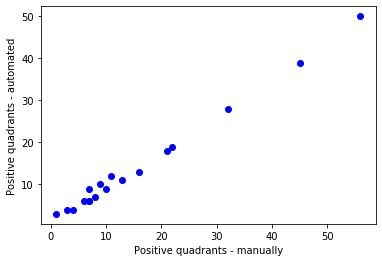

0.996417440789381


<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure()
plt.plot(results[:,0],results[:,1], 'bo')
plt.xlabel('Positive quadrants - manually')
plt.ylabel('Positive quadrants - automated')
plt.show()
plt.savefig('positive.png')
print(np.corrcoef(results[:,0],results[:,1])[0,1])

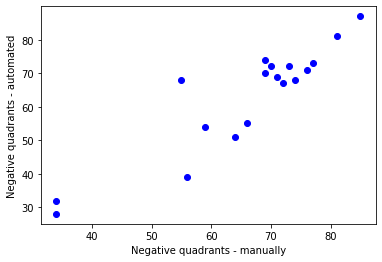

0.9103749520080451


<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure()
plt.plot(results[:,2],results[:,3], 'bo')
plt.xlabel('Negative quadrants - manually')
plt.ylabel('Negative quadrants - automated')
plt.show()
plt.savefig('negative.png')
print(np.corrcoef(results[:,2],results[:,3])[0,1])